# Delicious Asian and Indian Cuisines 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE 

df = pd.read_csv('../data/cuisines.csv')


df.cuisine.value_counts()

thai_df= df[(df.cuisine == "thai")]
japanese_df=df[(df.cuisine ==  "japanese")]
chinese_df= df[(df.cuisine ==  "chinese")]
indian_df= df[(df.cuisine ==  "indian")]
korean_df= df[(df.cuisine ==  "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')


thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [ ]:

def create_ingredients(df):
    ingredient_df = df.T.drop(["cuisine","Unnamed: 0"]).sum(axis=1).to_frame("value")
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,inplace=False)
    return ingredient_df

<Axes: >

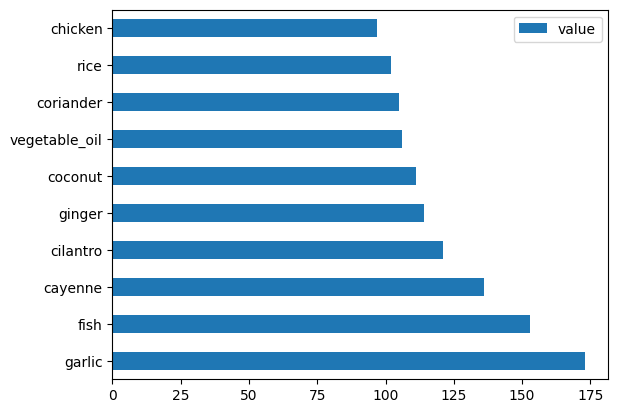

In [ ]:
thai_ingredient_df = create_ingredients(thai_df)
thai_ingredient_df.head(10).plot.barh()

japanese_ingredient_df = create_ingredients(japanese_df)
chinese_ingredient_df = create_ingredients(chinese_df)
indian_ingredient_df = create_ingredients(indian_df)
korean_ingredient_df = create_ingredients(korean_df)

In [40]:
feature_df = df.drop(["cuisine", "Unnamed: 0", "rice" , "chicken", "garlic"], axis=1)
labels_df = df.cuisine
feature_df.head()



,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [52]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

transformed_df.head()
transformed_df.info()
transformed_df.to_csv("../data/cleaned_cuisines.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB
